### Задание
Считать цветное изображение, найти его контуры, вывести:

1. Все контуры
2. Половину контуров
3. Четверть контуров
4. Самый длинный контур

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

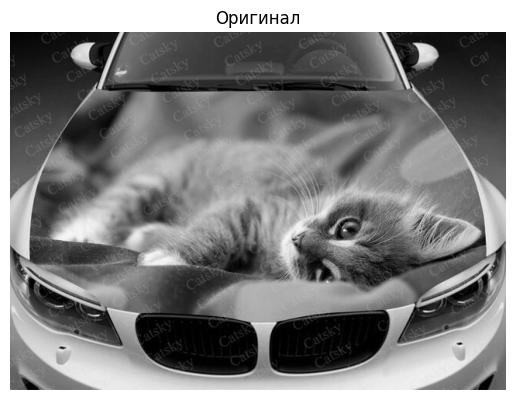

In [2]:
img = cv2.imread('cat.jpg', 0)
ret,thresh = cv2.threshold(img,128,255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, 5, 5)

plt.axis('off')
plt.title("Оригинал")
plt.imshow(img, cmap='gray');

In [3]:
# Количества контуров
len_cont = len(contours)
print("Количество контуров: ", len_cont)

Количество контуров:  618


### Найдем все контуры

In [4]:
mask = np.zeros(img.shape,np.uint8)
all_cont = cv2.drawContours(mask,contours,-1,255,2)

### Найдем половину контуров

In [5]:
i = 0
cnt = []
while len(cnt) < len_cont/2:
    cnt.append(contours[i])
    i += 1

In [6]:
mask = np.zeros(img.shape,np.uint8)
half_count = cv2.drawContours(mask,cnt,-1,255,2)
#plt.imshow(mask, cmap='gray');

### Найдем четверть контуров

In [7]:
i = 0
cnt = []
while len(cnt) < len_cont/4:
    cnt.append(contours[i])
    i += 1

### Найдем самый длинный контур

In [8]:
mask = np.zeros(img.shape,np.uint8)
four_count = cv2.drawContours(mask,cnt,-1,255,2)

In [9]:
mask = np.zeros(img.shape,np.uint8)
max=0
sel_countour=None
for countour in contours:
    if countour.shape[0]>max:
        sel_countour=countour
        max=countour.shape[0]

max_kont = cv2.drawContours(mask, [sel_countour], -1, (255,255,255), 2)

### Организуем вывод изображений

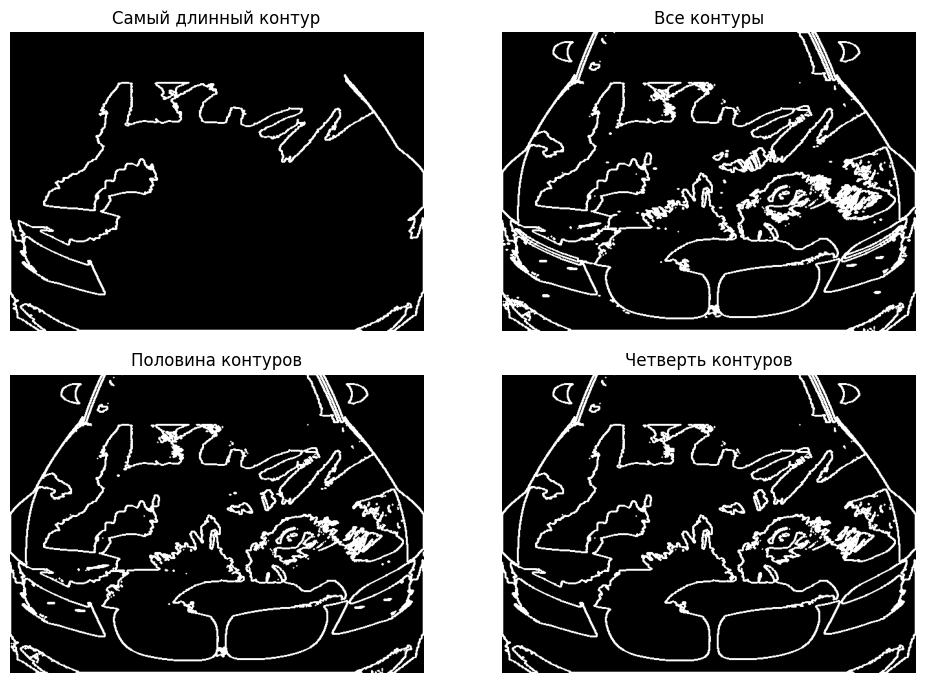

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(10,7))
fig.tight_layout()
signature = ["Самый длинный контур", "Все контуры", "Половина контуров", "Четверть контуров"]
images = [max_kont, all_cont, half_count, four_count]
pose = 221
i = 0
while i < 4:
    plt.subplot(pose)
    plt.axis('off')
    plt.title(signature[i])
    plt.imshow(images[i], cmap='gray')
    pose += 1
    i += 1